In [483]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [484]:
# df = sns.load_dataset("titanic")
df = pd.read_csv("titanic.csv")
# df = pd.read_csv("car_price_dataset.csv")

In [485]:
df.head()
# df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [487]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [488]:
df.drop("Cabin", axis=1, inplace=True)
df.drop("PassengerId", axis=1, inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\navod\AppData\Local\Temp\ipykernel_23180\3786320216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\navod\AppData\Local\Temp\ipykernel_23180\3786320216.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [489]:
df.duplicated().sum()


np.int64(0)

## Handling Outliers
 IQR Method

In [490]:
# Handling outliers

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]


Z score method

In [491]:
from scipy import stats

df["Z_Score"] = abs(stats.zscore(df["Age"]))
df = df[df["Z_Score"] < 3]
df.drop(columns=["Z_Score"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Univariate Analysis


Statistical Analysis

In [492]:
numerical_columns = ["Age", "Fare", "Parch", "SibSp"]

stats = df[numerical_columns].describe().T
stats["mode"] = df[numerical_columns].mode().T[0]
stats["skew"] = df[numerical_columns].skew()
stats["variance"] = df[numerical_columns].var()
stats.T

,Age,Fare,Parch,SibSp
count,769.000000,769.000000,769.000000,769.000000
mean,28.405397,17.778852,0.343303,0.440832
std,12.219669,13.549928,0.788399,0.902512
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000
50%,28.000000,13.000000,0.000000,0.000000
75%,34.000000,26.000000,0.000000,1.000000
max,66.000000,65.000000,6.000000,5.000000
mode,28.000000,8.050000,0.000000,0.000000
skew,0.309475,1.441620,3.130821,2.777141


Frequency distribution for categorical columns

Frequency distribution for Survived:

Survived
0    507
1    262
Name: count, dtype: int64


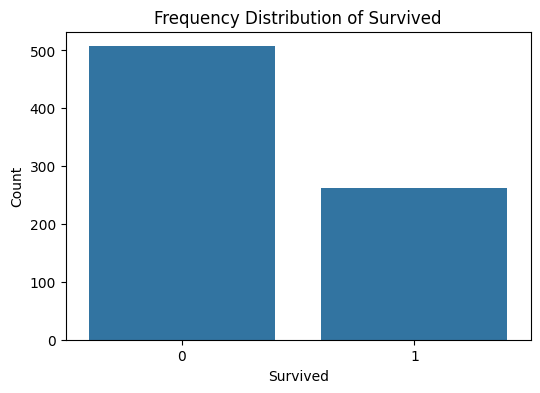

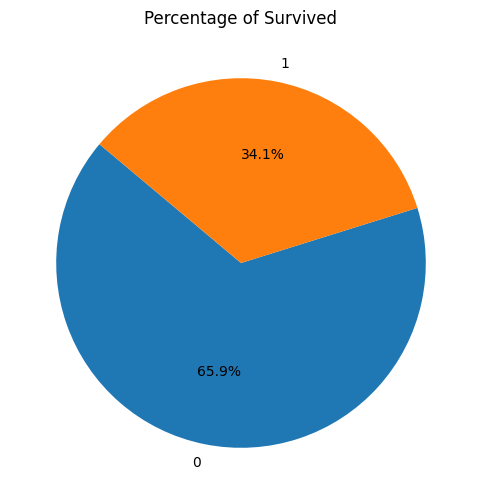



Frequency distribution for Pclass:

Pclass
3    482
2    178
1    109
Name: count, dtype: int64


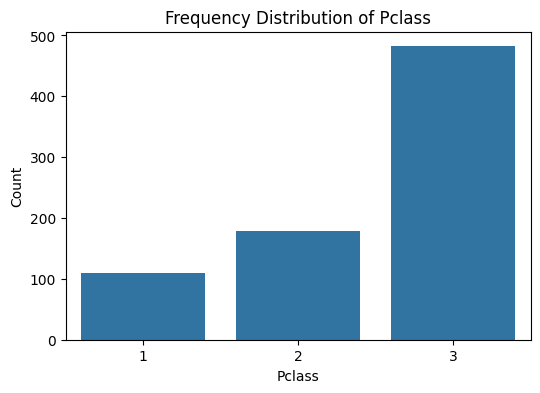

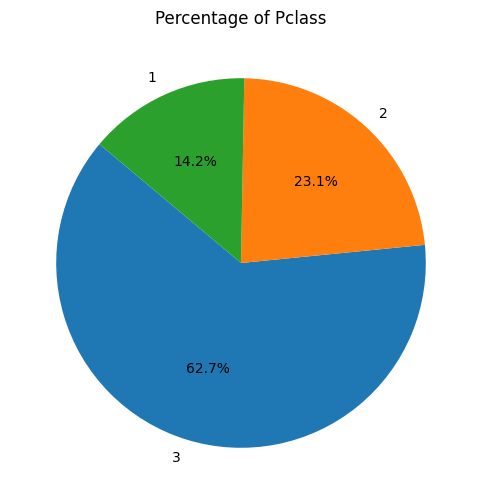



Frequency distribution for Sex:

Sex
male      525
female    244
Name: count, dtype: int64


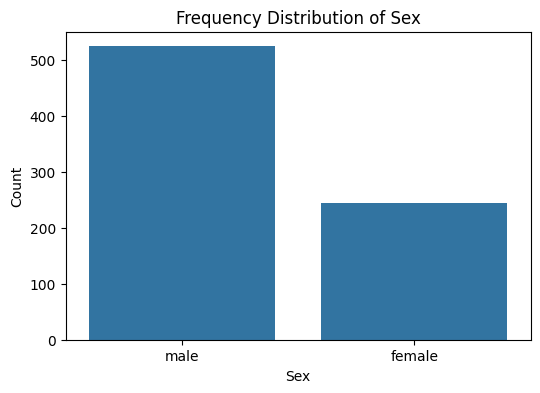

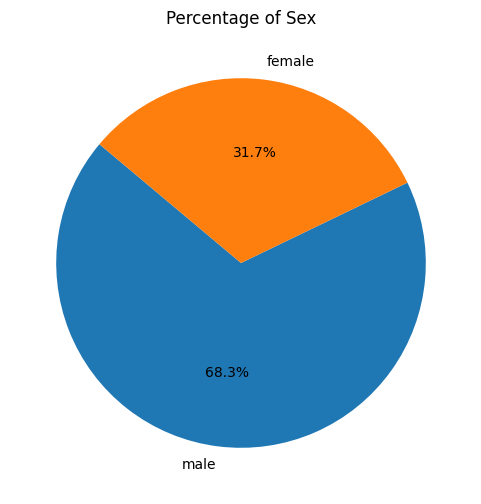



Frequency distribution for Embarked:

Embarked
S    581
C    114
Q     74
Name: count, dtype: int64


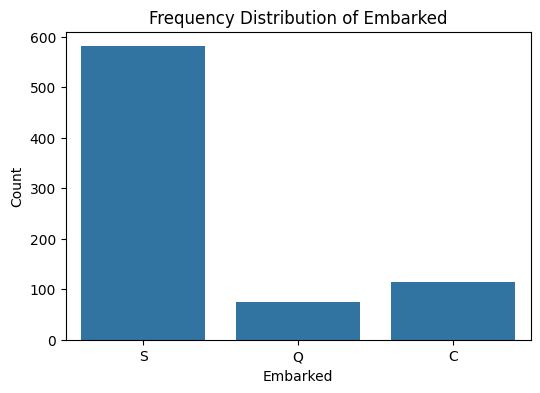

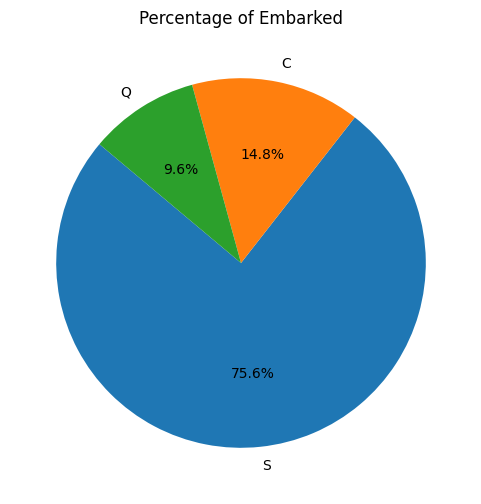

In [493]:
categorical_columns = ["Survived", "Pclass", "Sex", "Embarked"]

for col in categorical_columns:
    print(f"Frequency distribution for {col}:\n")
    print(df[col].value_counts())
    
    # Count Plot (Bar Chart)
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Percentage of {col}")
    plt.show()
    
    print("\n")


Histogram for numerical columns

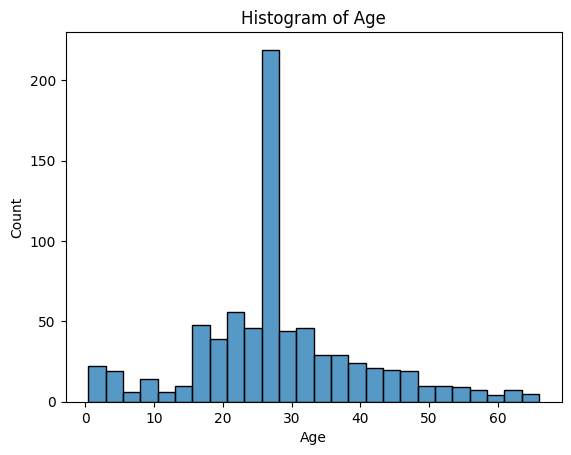

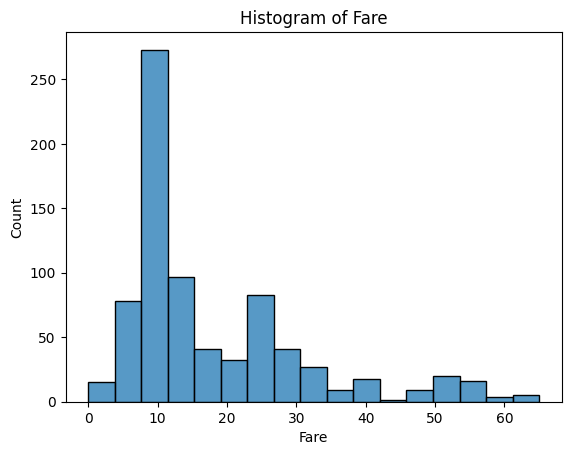

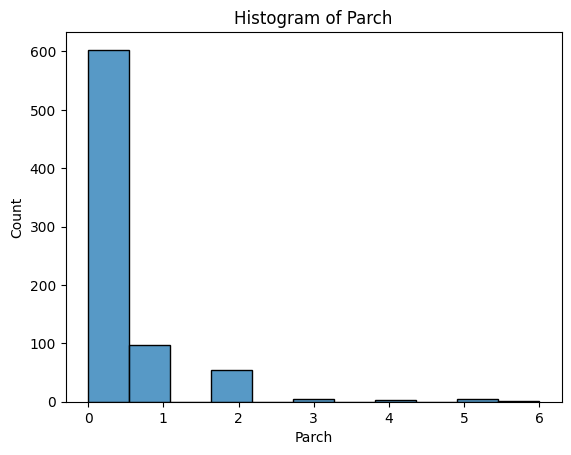

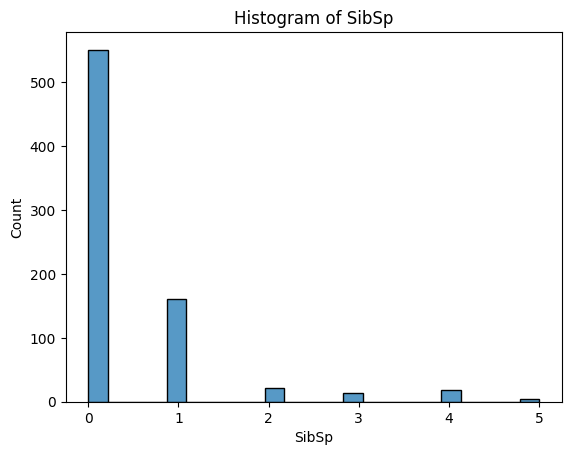

In [494]:
for col in numerical_columns:
    sns.histplot(df[col], kde=False)
    plt.title(f"Histogram of {col}")
    plt.show()

Box plots for numerical columns

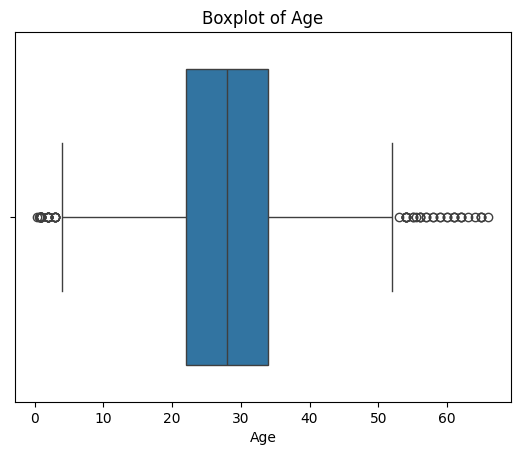

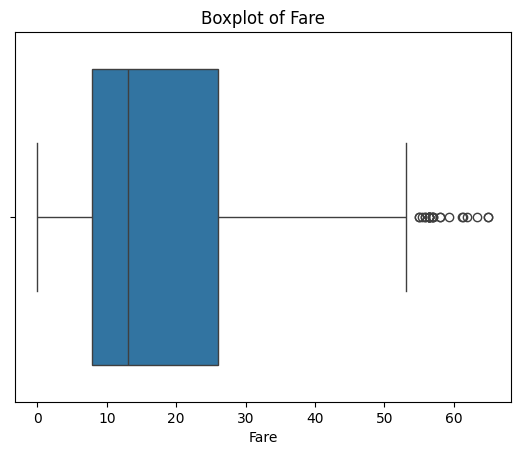

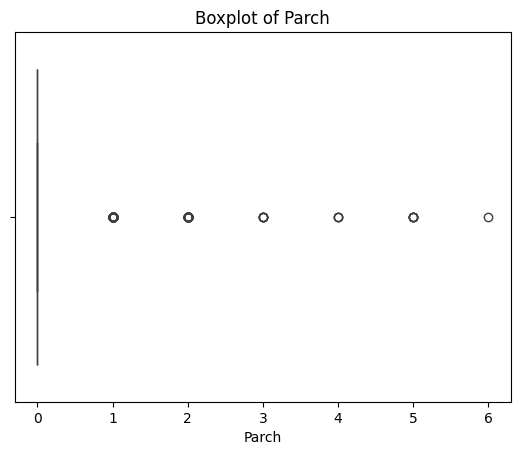

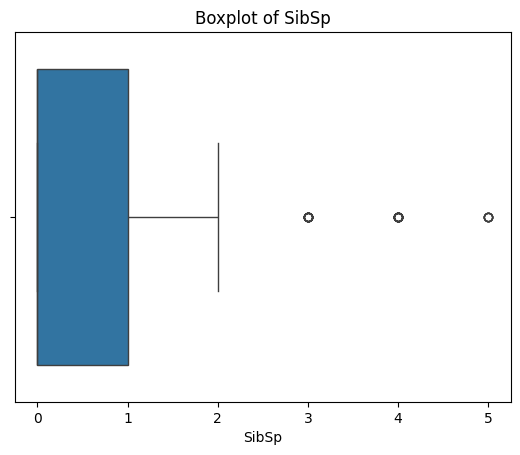

In [495]:


for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Bivariate Analysis

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.240775 -0.115591 -0.004557  0.097698  0.236344
Pclass   -0.240775  1.000000 -0.344623  0.111690  0.081248 -0.585860
Age      -0.115591 -0.344623  1.000000 -0.338370 -0.202320  0.078689
SibSp    -0.004557  0.111690 -0.338370  1.000000  0.409214  0.374510
Parch     0.097698  0.081248 -0.202320  0.409214  1.000000  0.340501
Fare      0.236344 -0.585860  0.078689  0.374510  0.340501  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

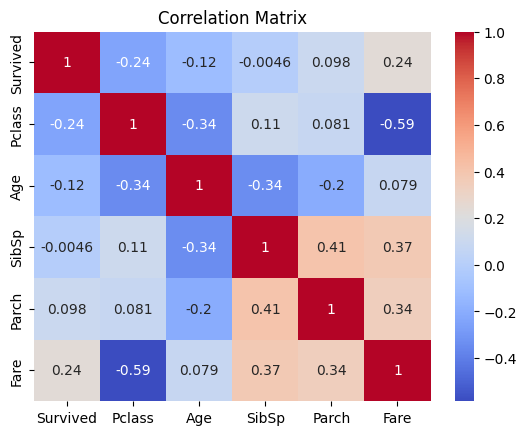

In [496]:
correlation_matrix = df.corr(numeric_only=True)

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

Numerical-Nimerical


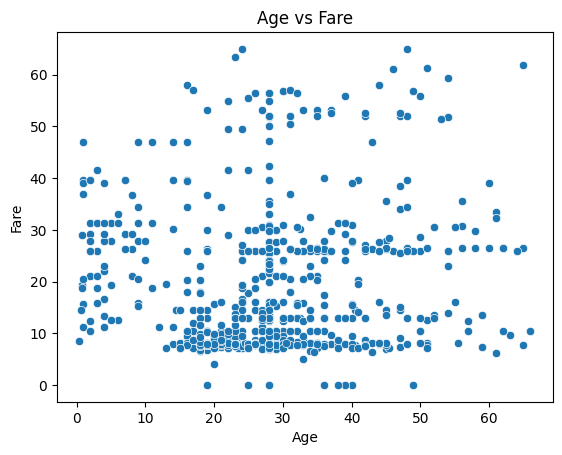

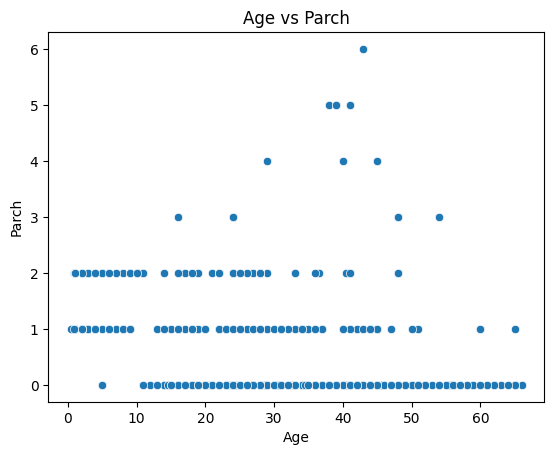

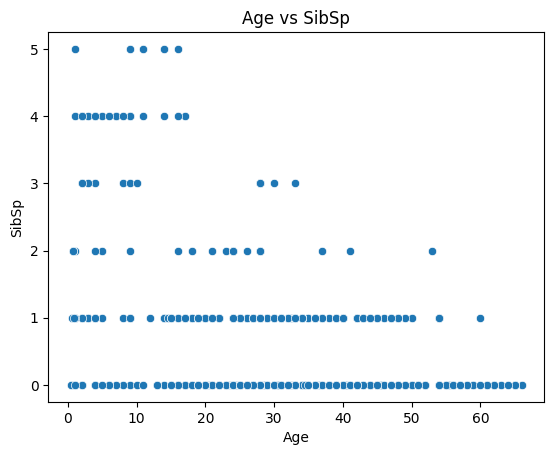

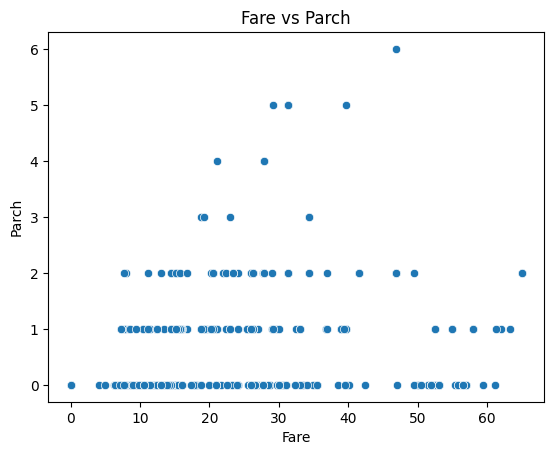

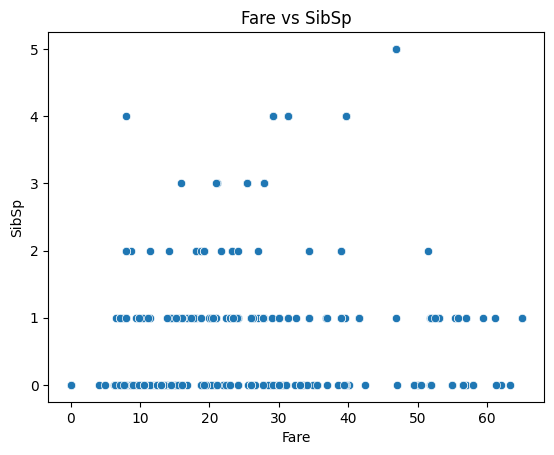

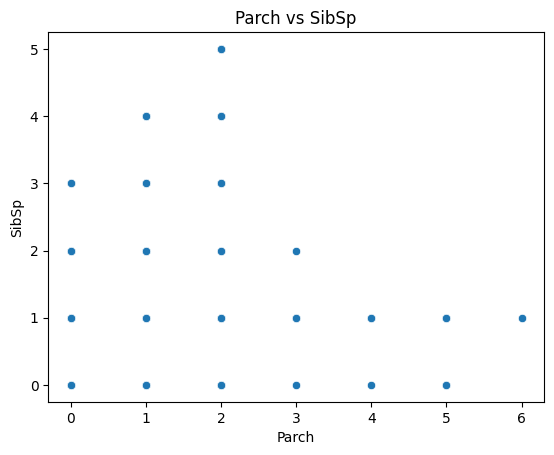

In [497]:
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]])
        plt.title(f"{numerical_columns[i]} vs {numerical_columns[j]}")
        plt.show()

# Numerical-categorical

Box-plots


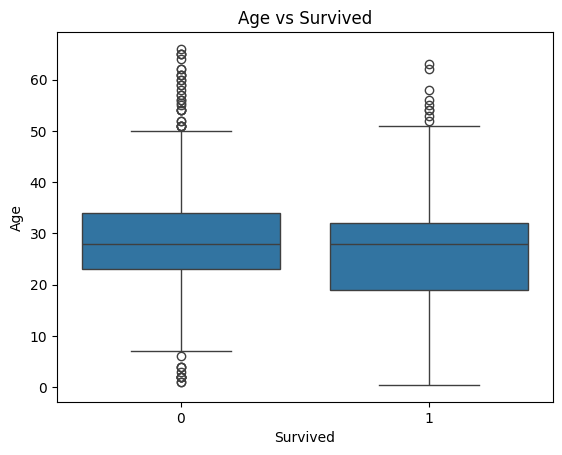

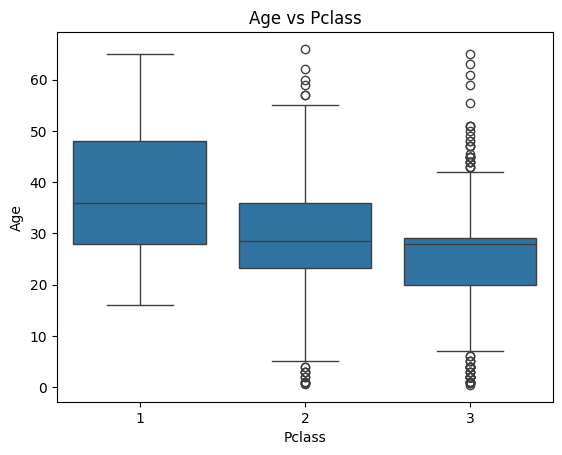

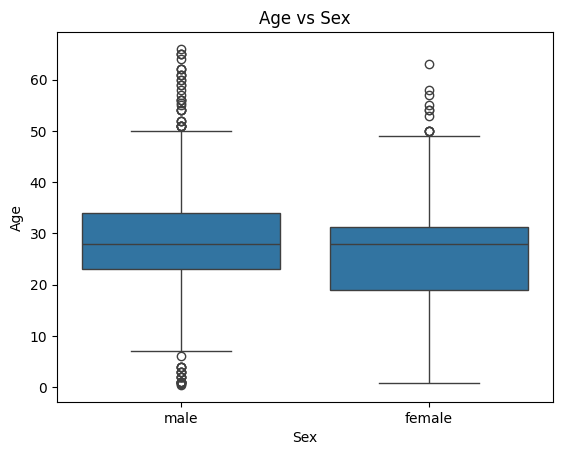

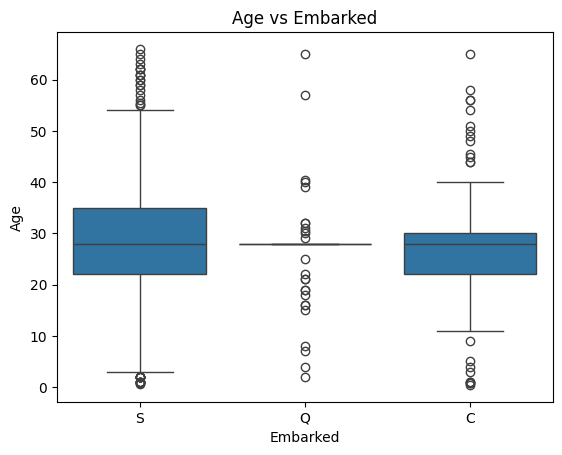

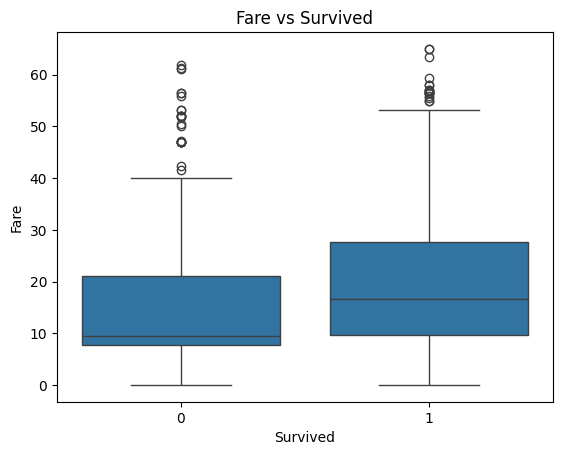

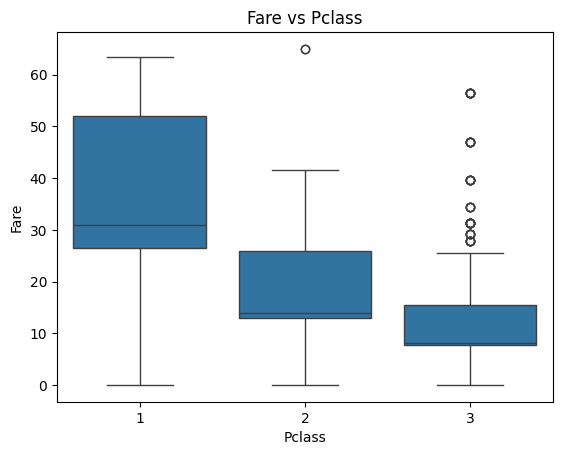

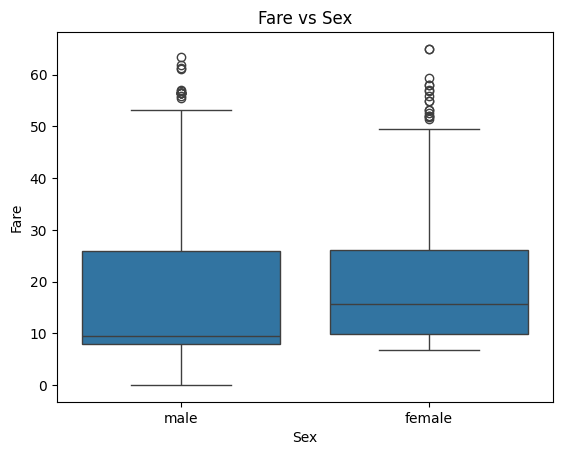

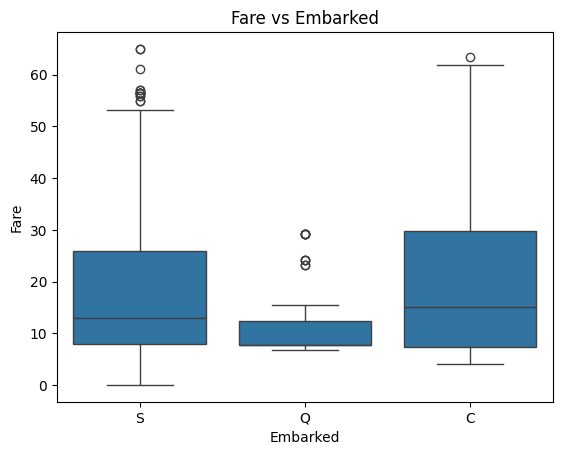

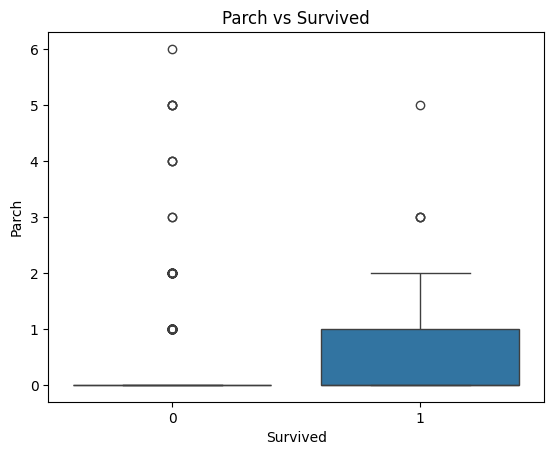

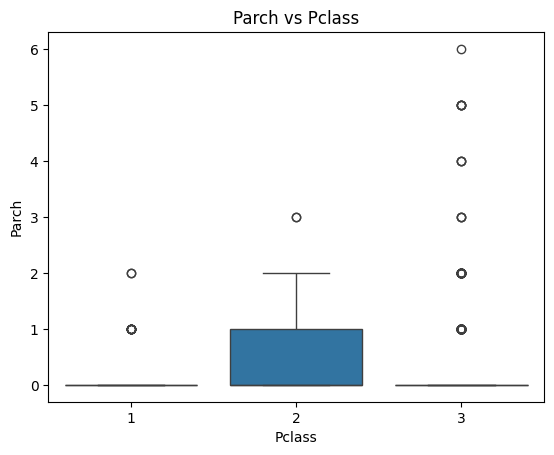

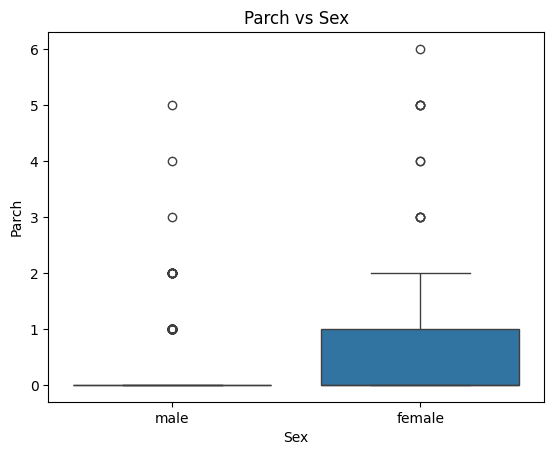

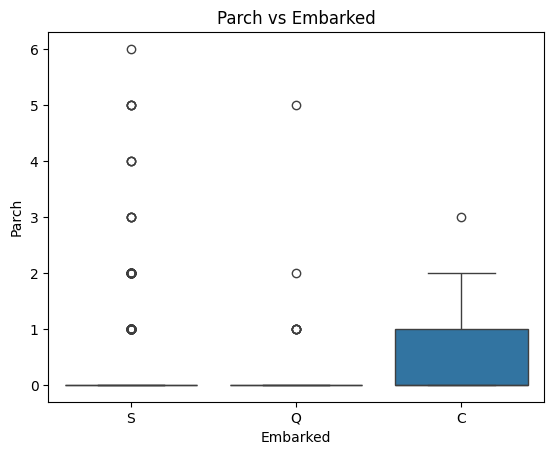

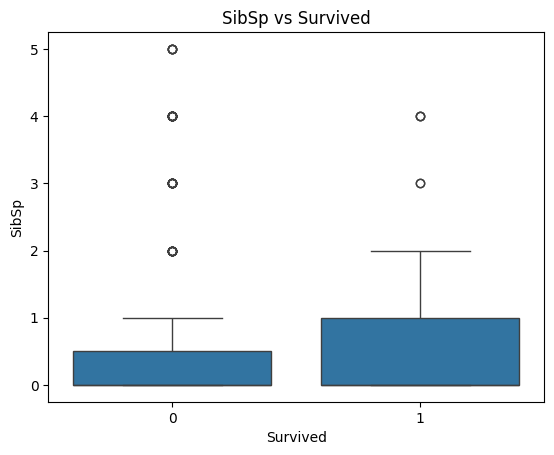

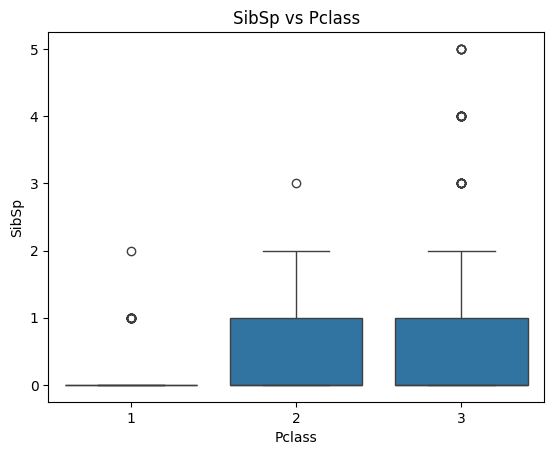

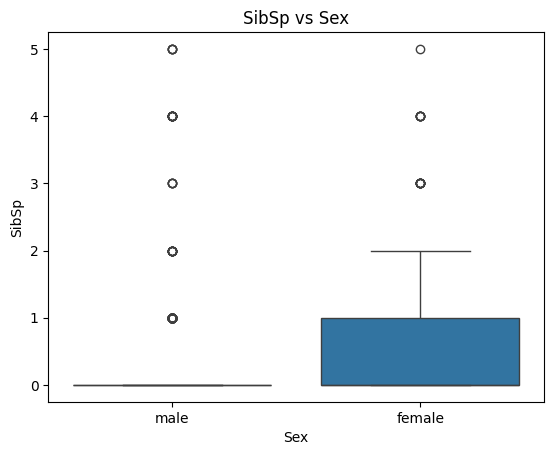

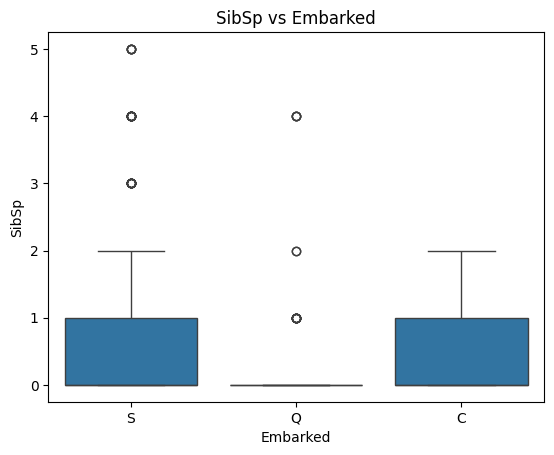

In [498]:
for i in numerical_columns:
    for j in categorical_columns:
        sns.boxplot(x=df[j], y=df[i])
        plt.title(f"{i} vs {j}")
        plt.show()

Barplot


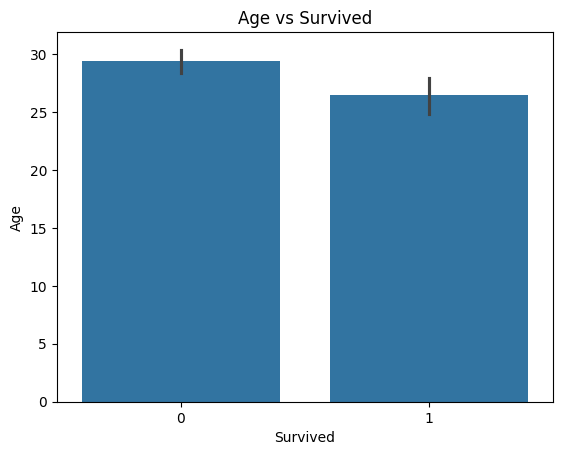

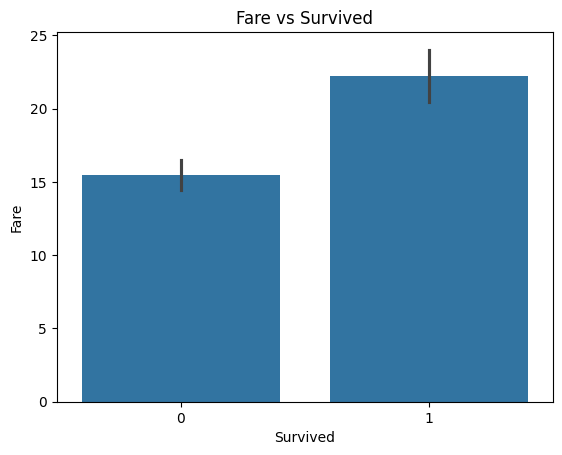

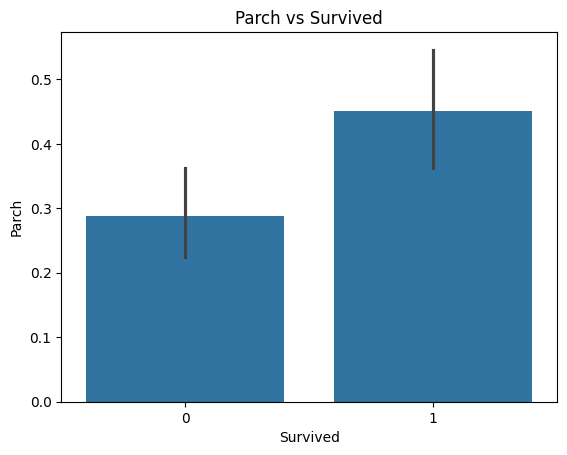

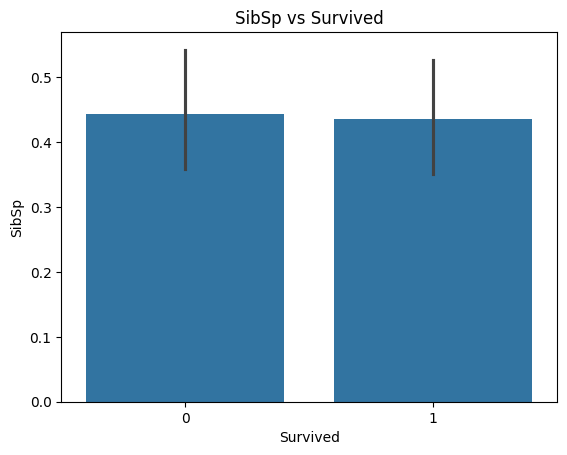

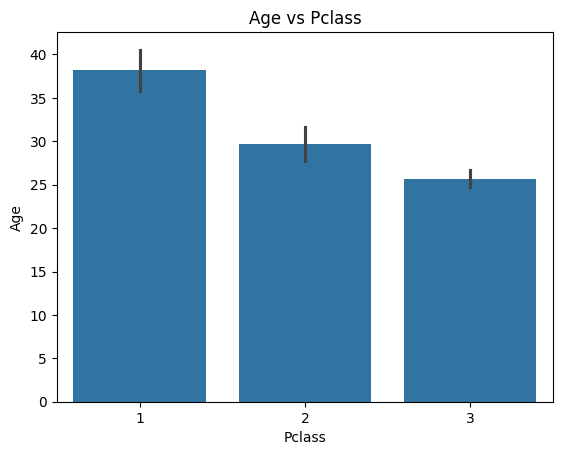

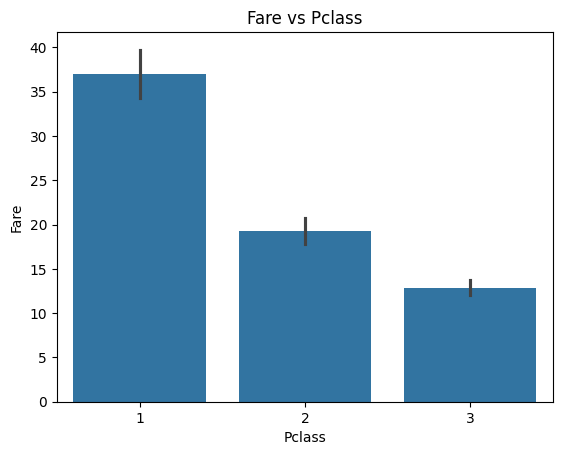

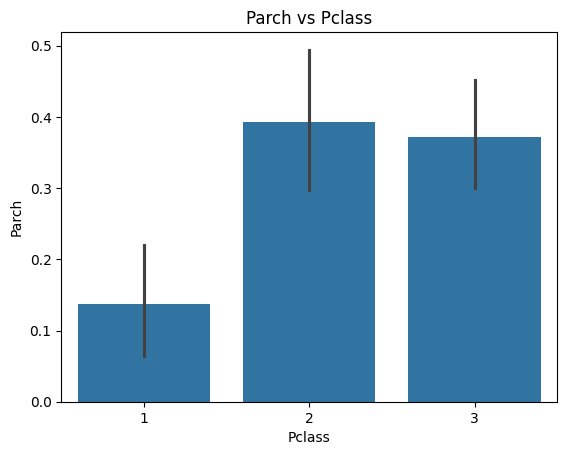

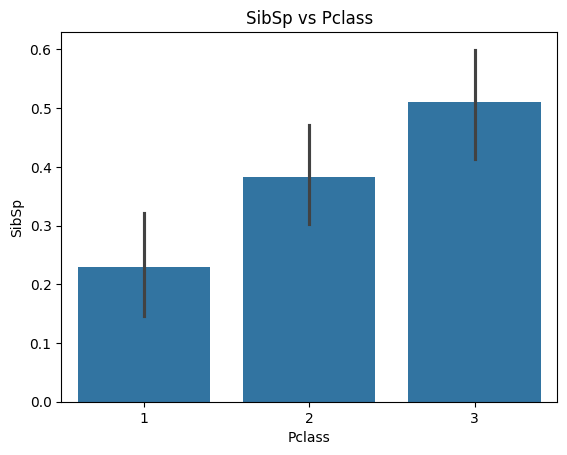

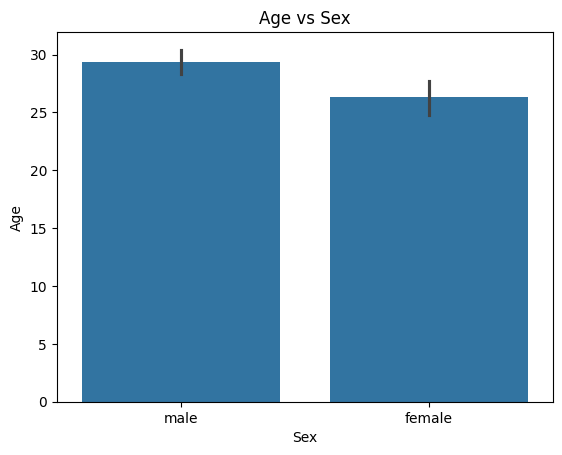

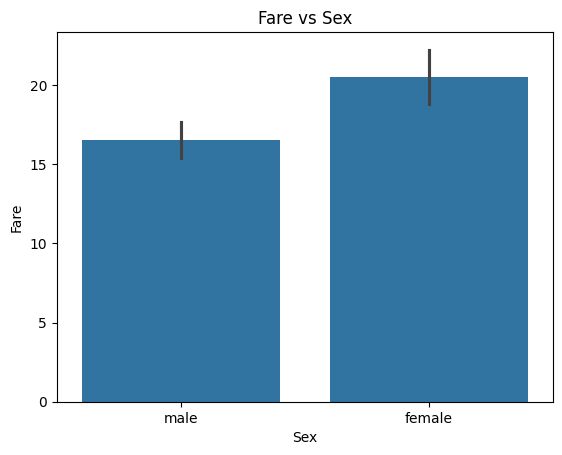

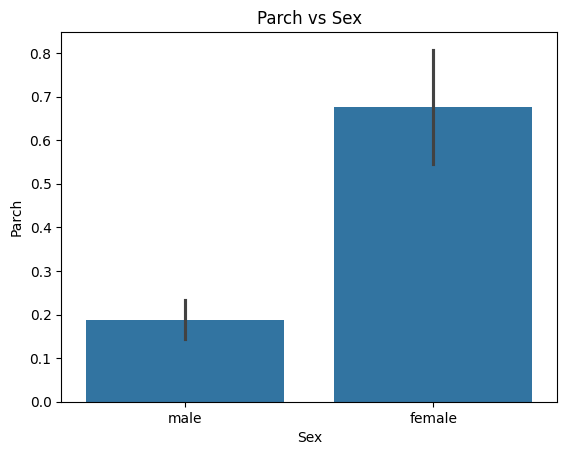

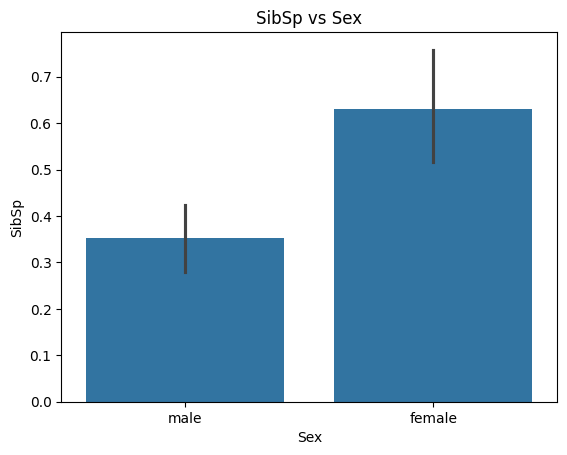

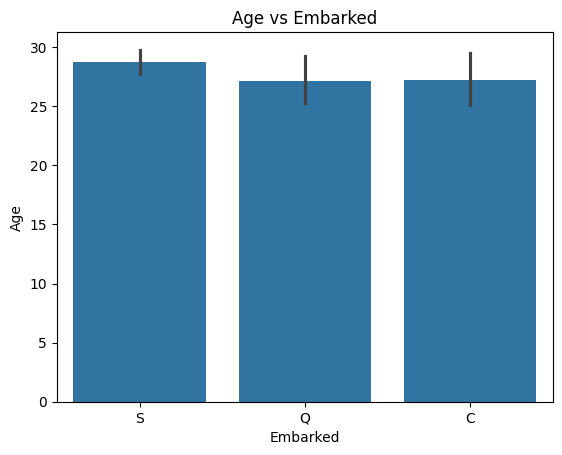

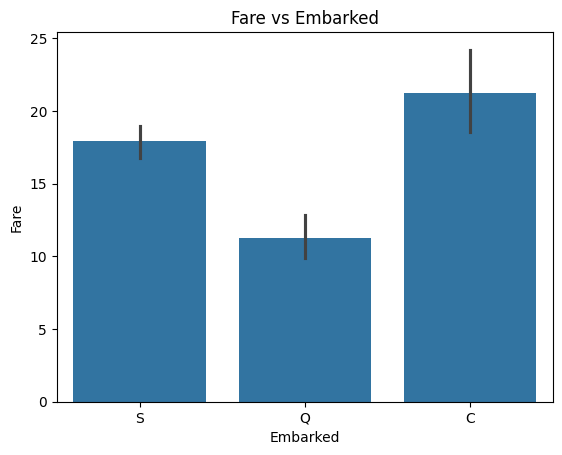

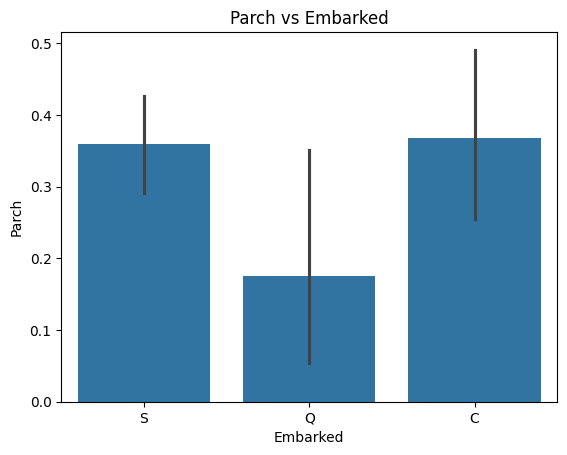

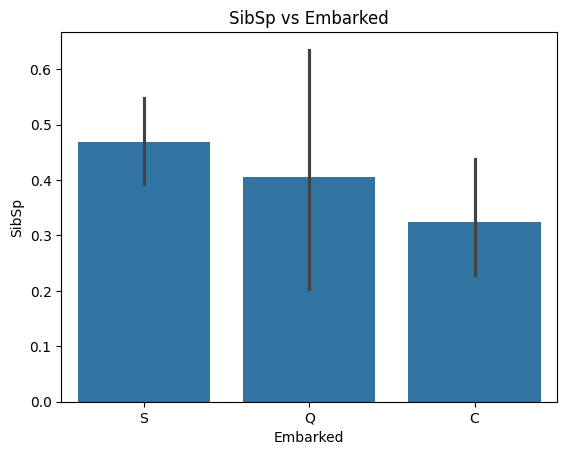

In [499]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.barplot(x=i, y=j, data=df)
        plt.title(f"{j} vs {i}")
        plt.show()

Violetplot

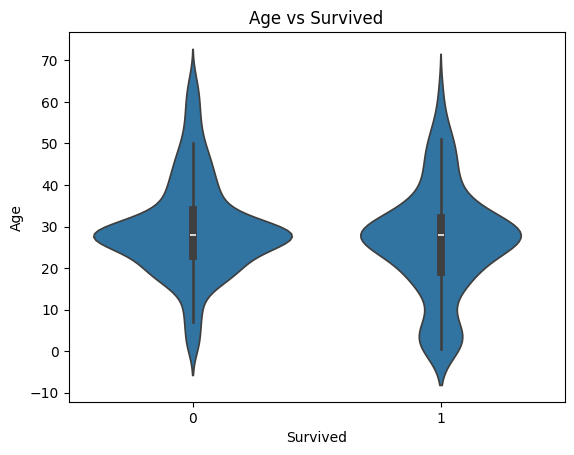

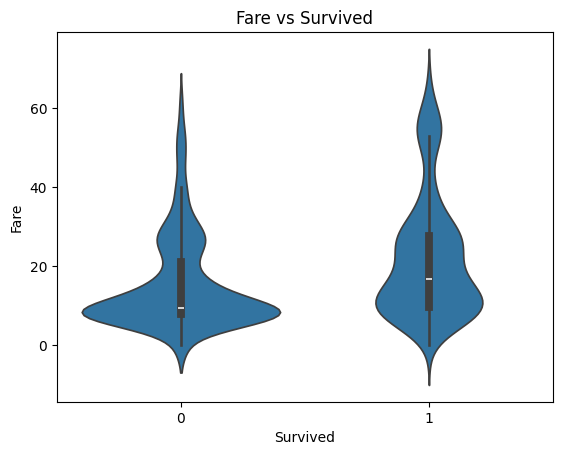

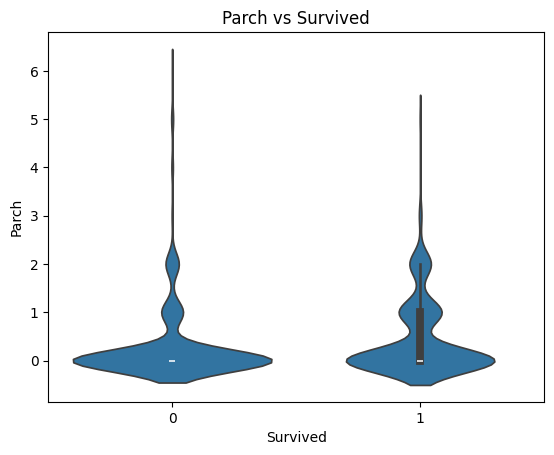

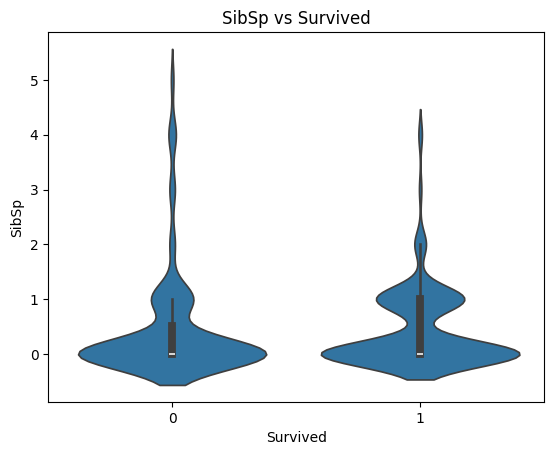

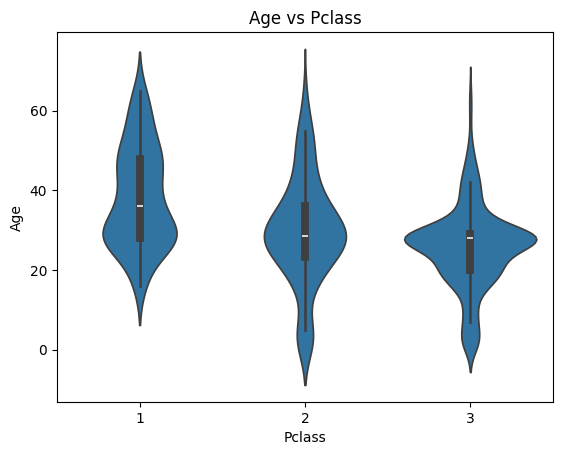

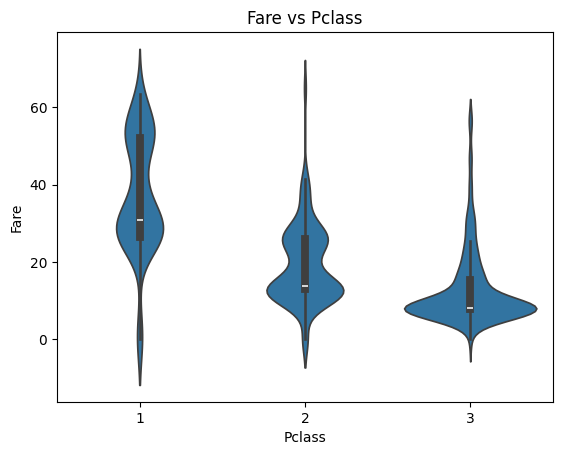

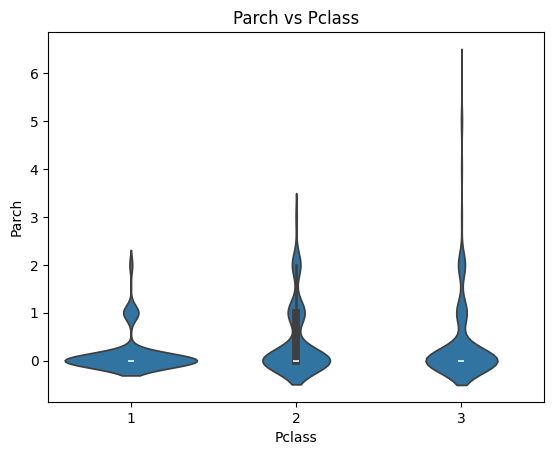

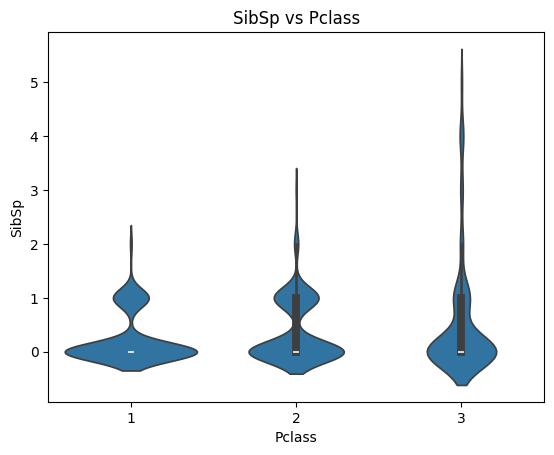

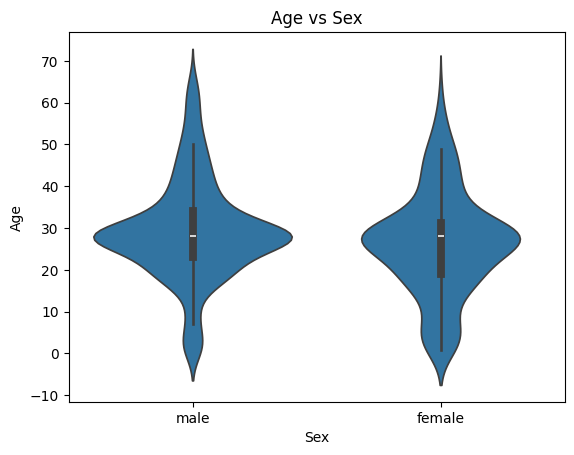

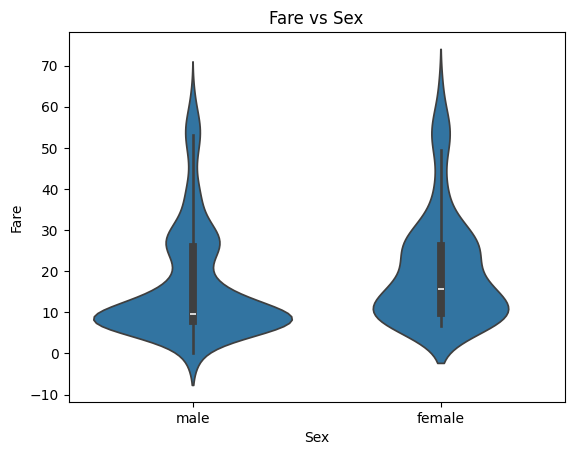

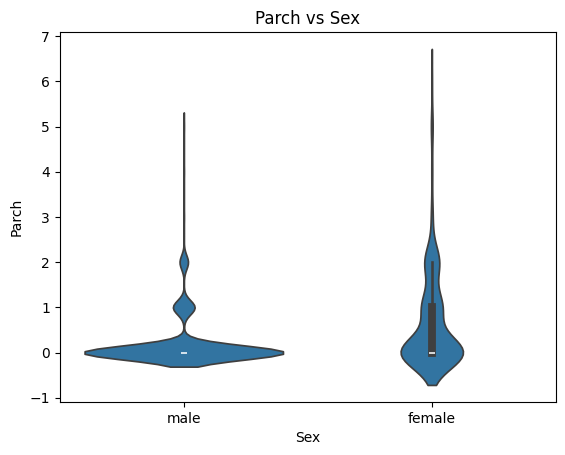

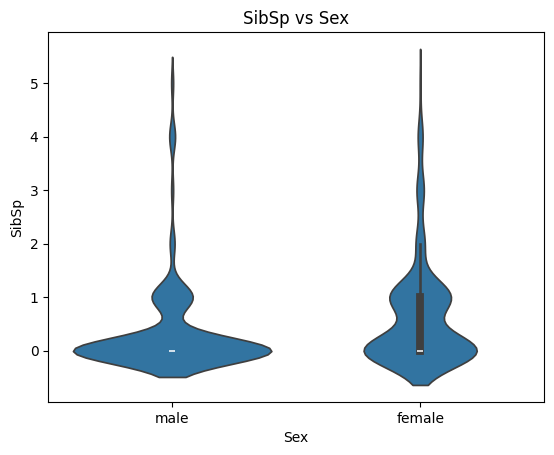

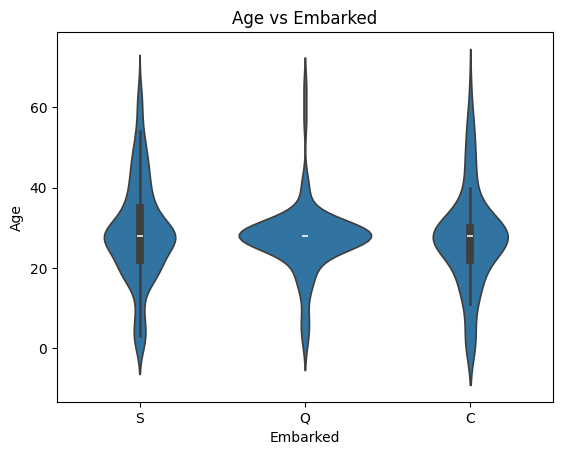

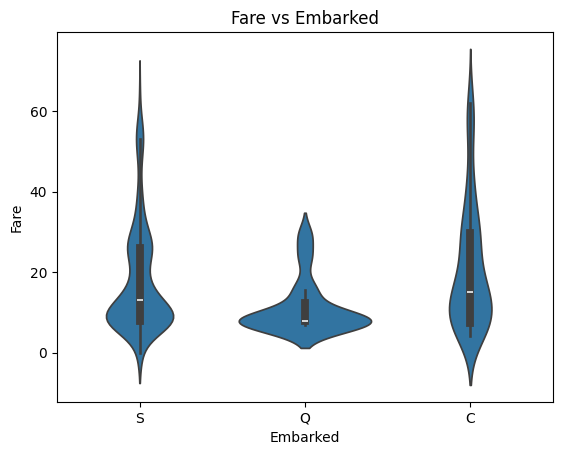

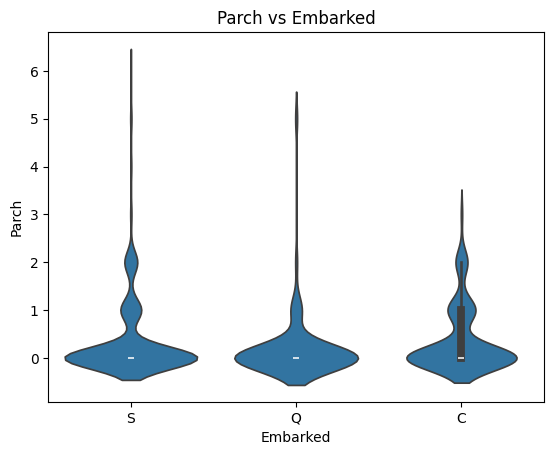

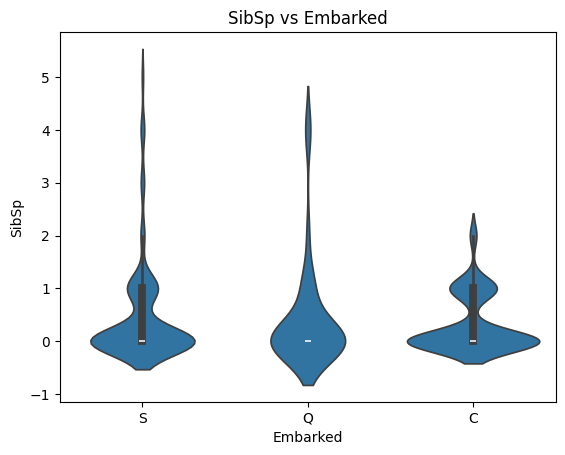

In [500]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.violinplot(x=i, y=j, data=df)
        plt.title(f"{j} vs {i}")
        plt.show()

kdeplot


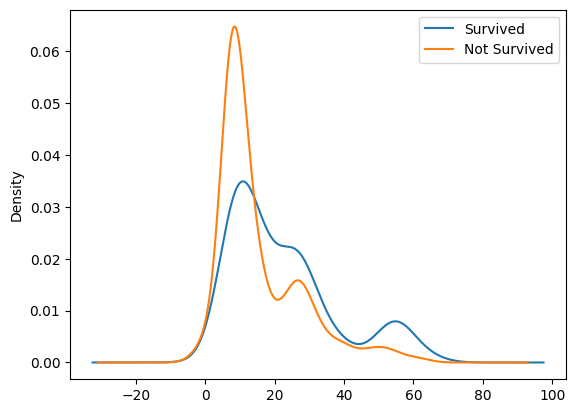

In [507]:
df[df['Survived'] == 1]['Fare'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Fare'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

# Categorical-categorical

crosstab and heatmap

Pclass     1   2    3
Survived             
0         53  91  363
1         56  87  119


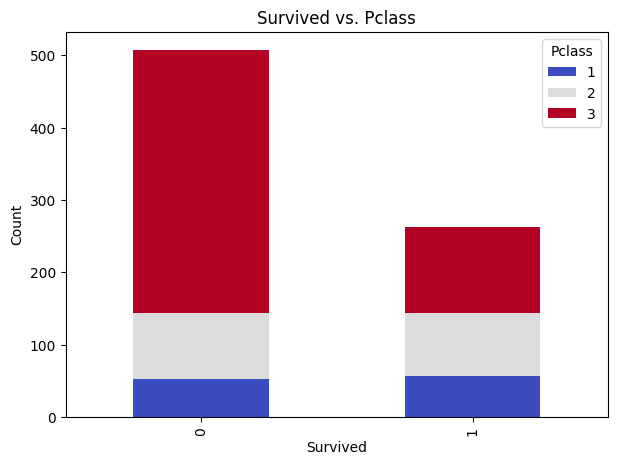

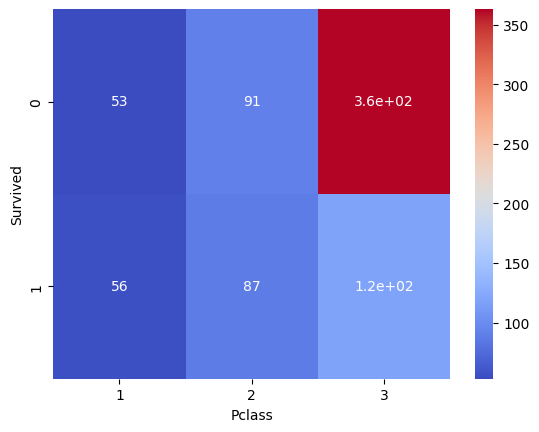

Sex       female  male
Survived              
0             76   431
1            168    94


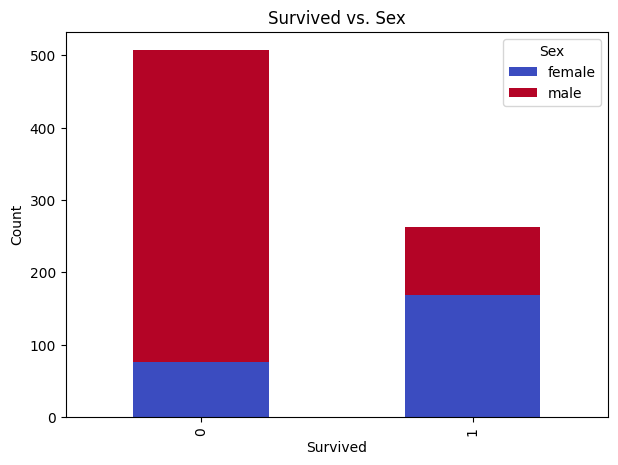

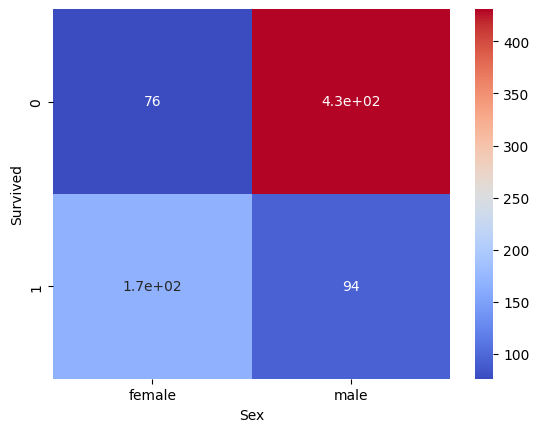

Embarked   C   Q    S
Survived             
0         62  45  400
1         52  29  181


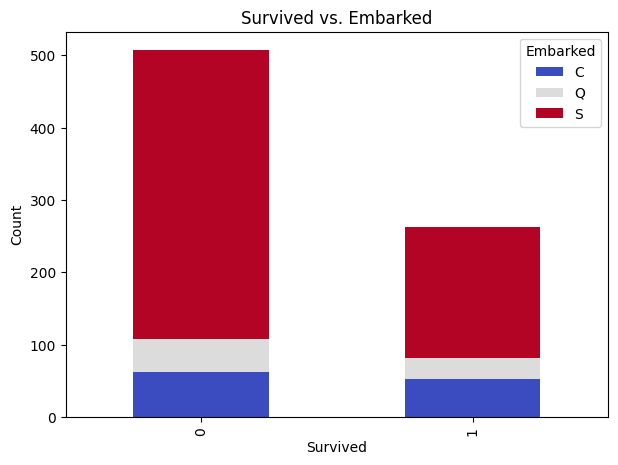

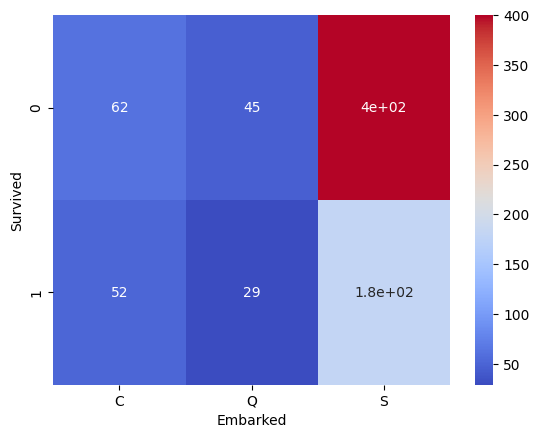

Sex     female  male
Pclass              
1           27    82
2           76   102
3          141   341


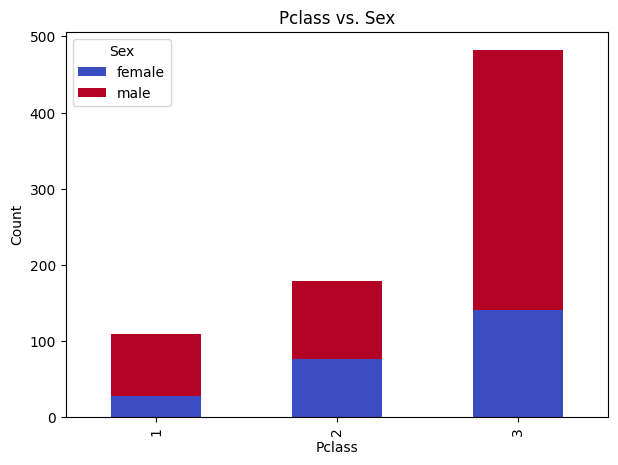

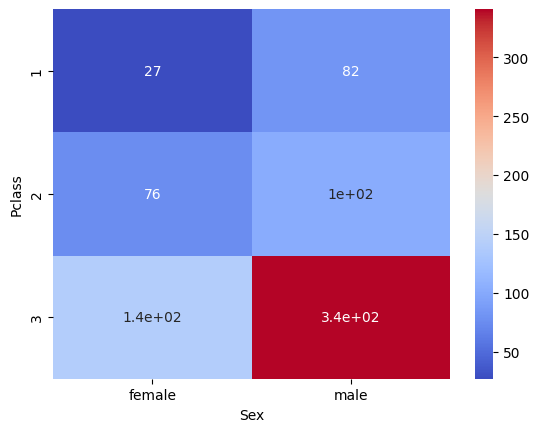

Embarked   C   Q    S
Pclass               
1         31   0   78
2         17   3  158
3         66  71  345


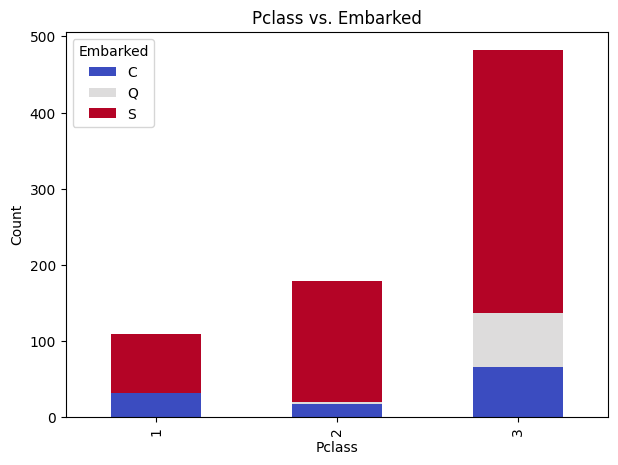

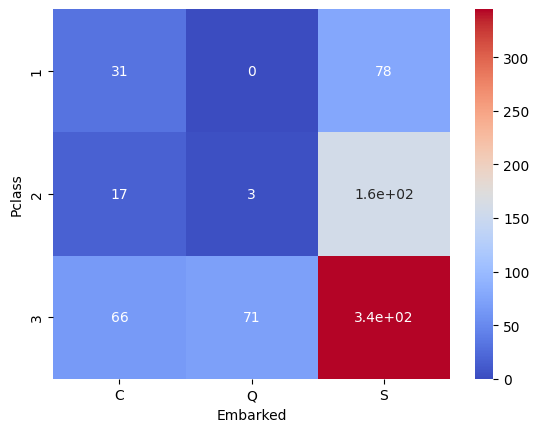

Embarked   C   Q    S
Sex                  
female    40  35  169
male      74  39  412


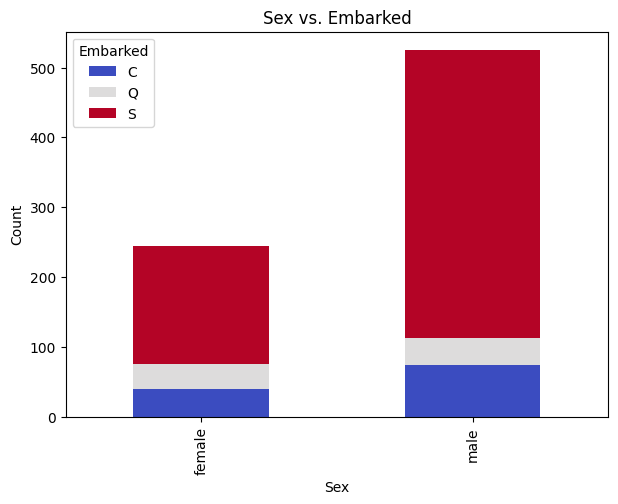

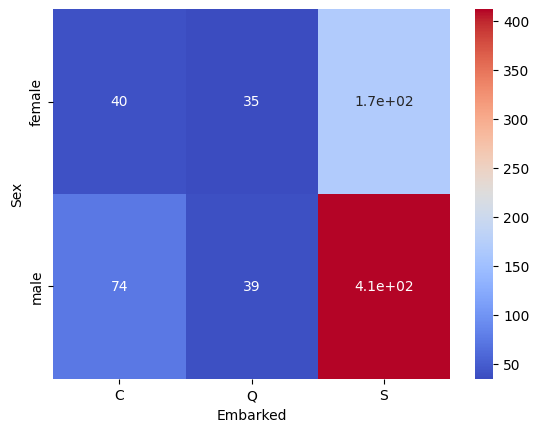

In [506]:
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        ct = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        print(ct)
        
        ct.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(7, 5))
        plt.title(f"{categorical_columns[i]} vs. {categorical_columns[j]}")
        plt.xlabel(categorical_columns[i])
        plt.ylabel("Count")
        plt.legend(title=categorical_columns[j])
        plt.show()
        sns.heatmap(ct, annot=True, cmap="coolwarm")
        plt.show()
        

## Multivariate analysis

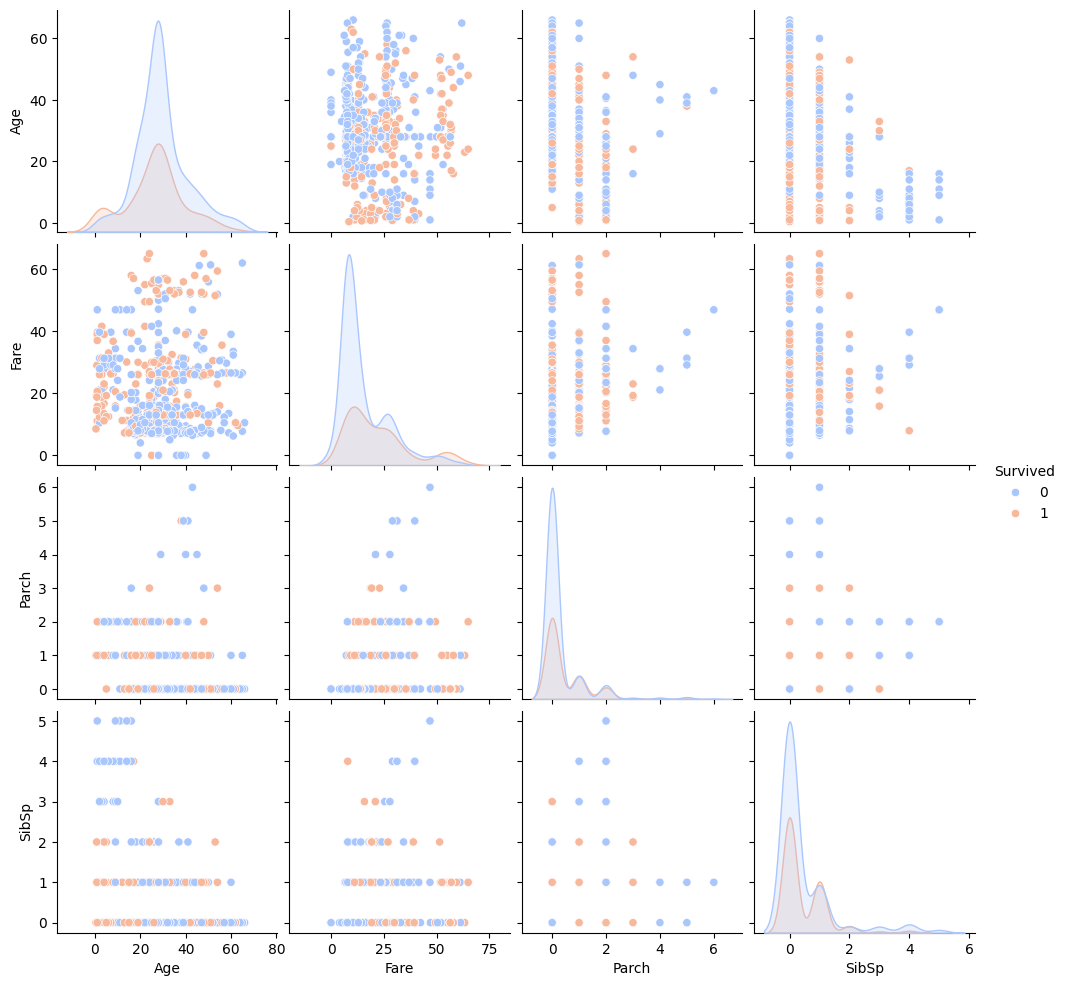

In [517]:
sns.pairplot(df, vars=numerical_columns, hue="Survived", palette="coolwarm")
plt.show()


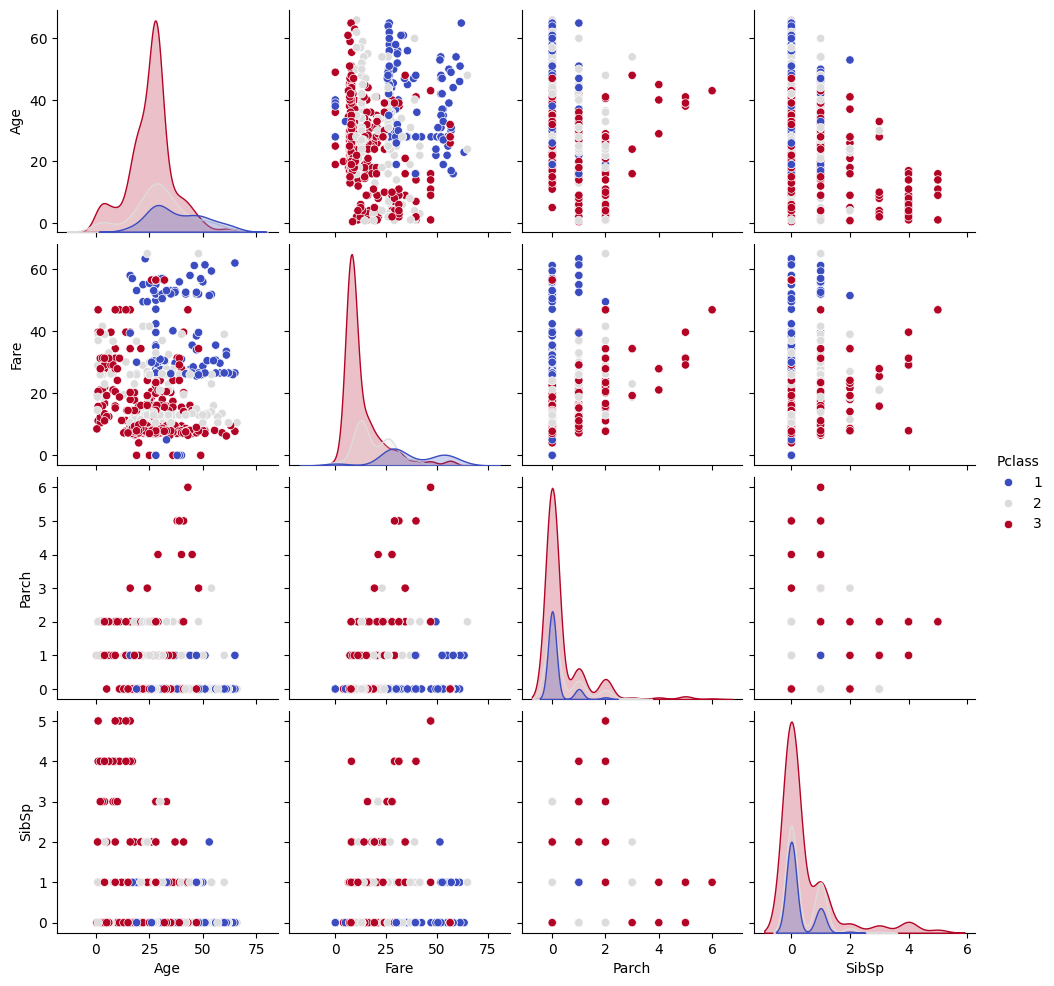

In [518]:
sns.pairplot(df, vars=numerical_columns, hue="Pclass", palette="coolwarm")
plt.show()

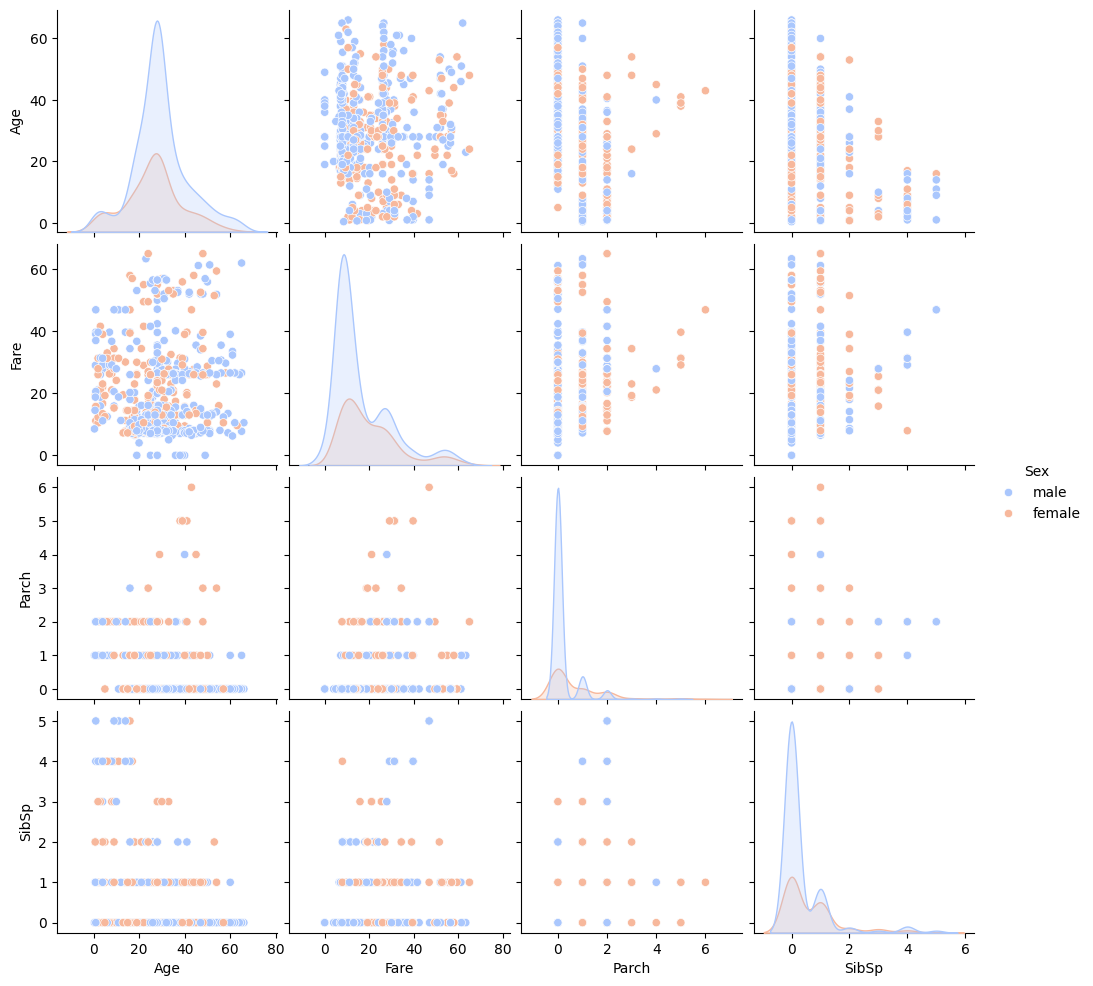

In [519]:
sns.pairplot(df, vars=numerical_columns, hue="Sex", palette="coolwarm")
plt.show()

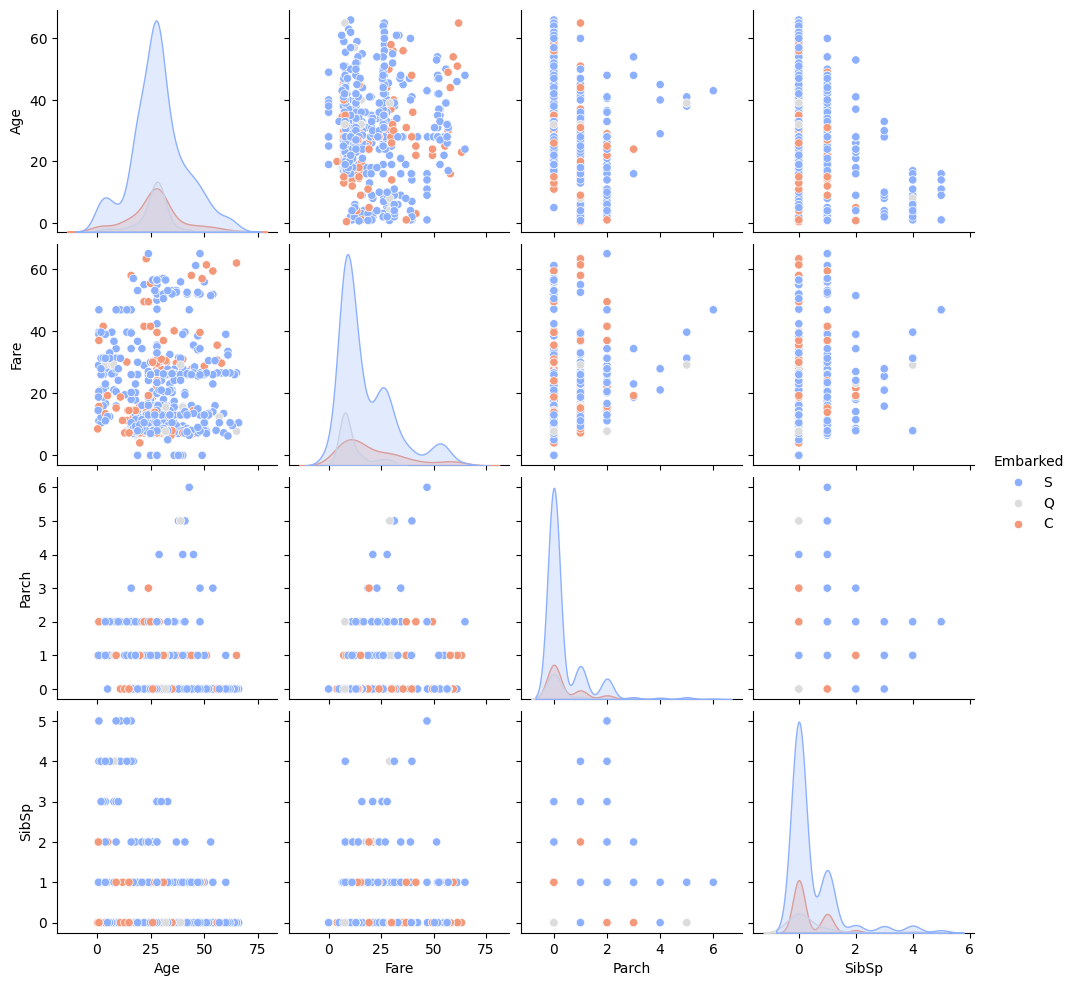

In [520]:
sns.pairplot(df, vars=numerical_columns, hue="Embarked", palette="coolwarm")
plt.show()

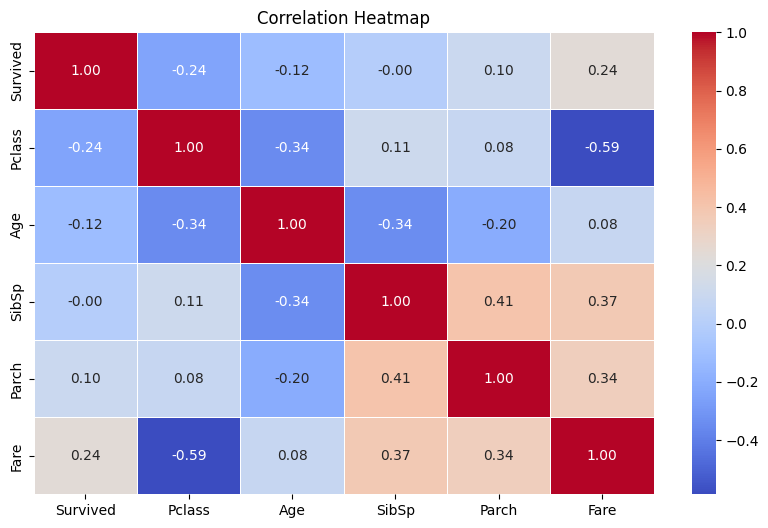

In [524]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

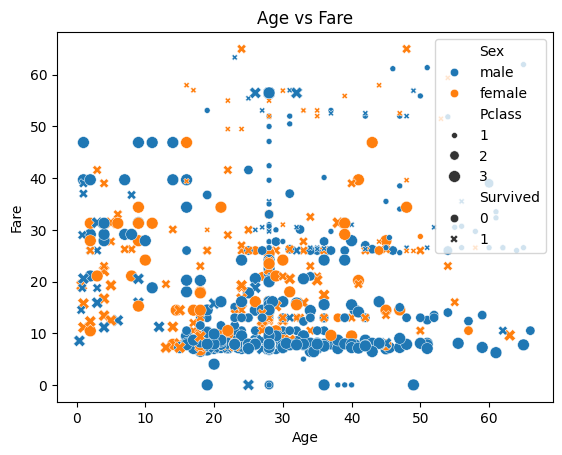

In [531]:
sns.scatterplot(x="Age", y="Fare", data=df, hue="Sex", style="Survived", size="Pclass")
plt.title("Age vs Fare")
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

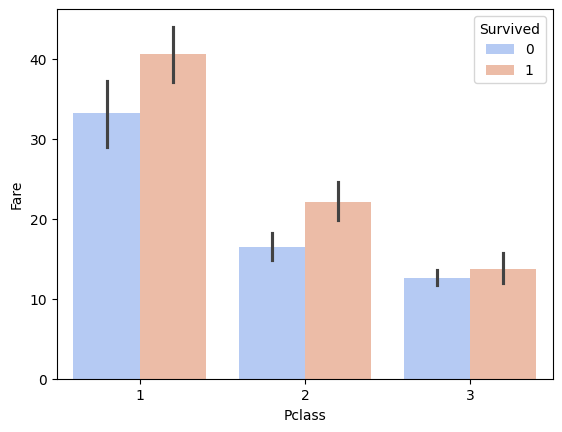

In [532]:
sns.barplot(x="Pclass", y="Fare", data=df, hue="Survived", palette="coolwarm")

<Axes: xlabel='Sex', ylabel='Age'>

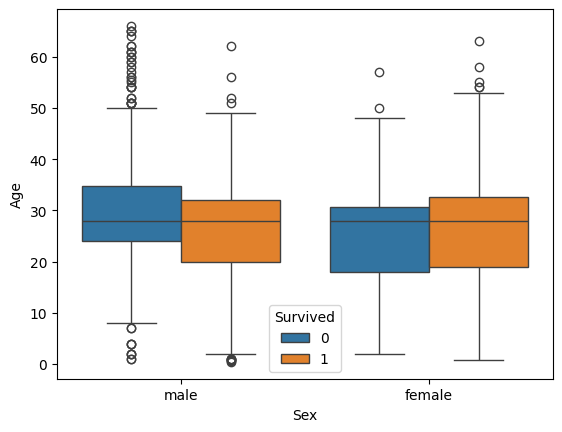

In [533]:
sns.boxplot(x="Sex", y="Age", data=df, hue="Survived")

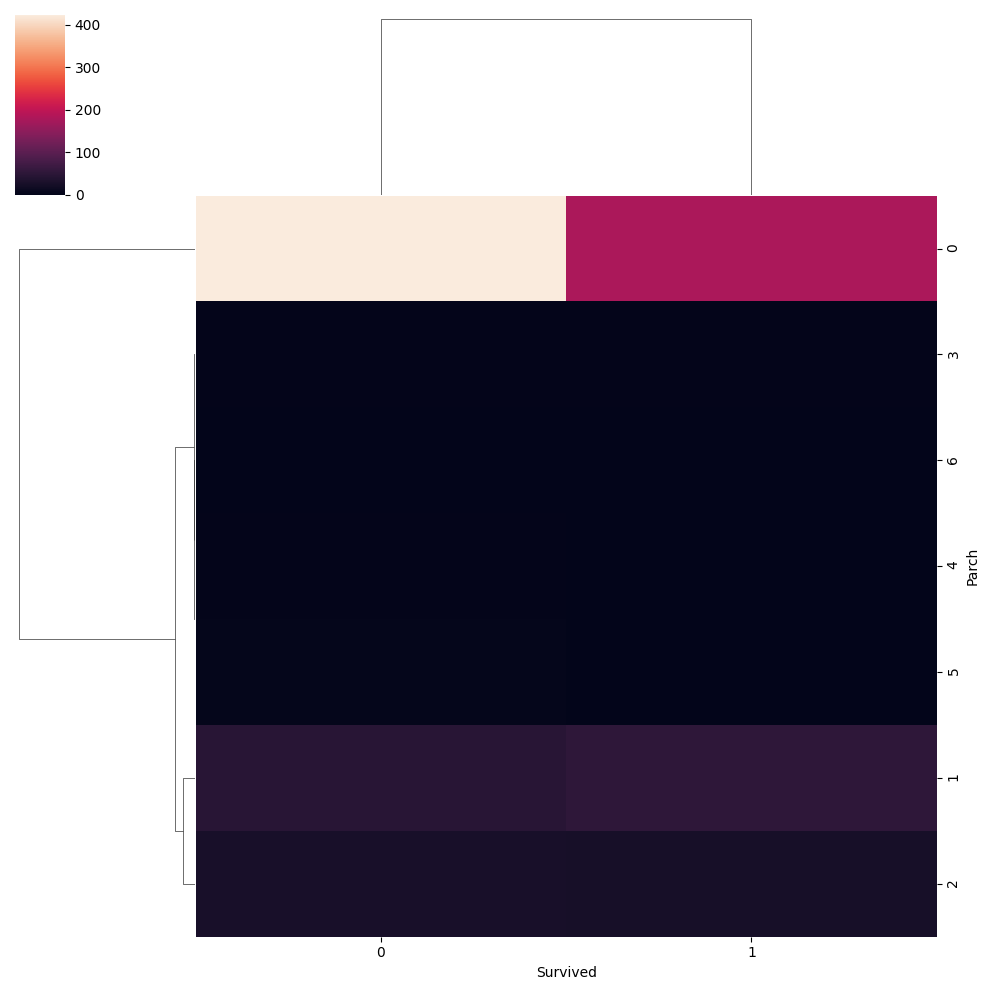

In [541]:
sns.clustermap(pd.crosstab(df["Parch"], df["Survived"]))